## Financial Inclusion in Africa

### Business Problem

Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and make payments while also helping businesses build up their credit-worthiness and improve their access to loans, insurance, and related services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### Main Objective

The main objective of this project is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

### Specific Objectives

* To identify countries within Africa that have more bank accounts
* To identify which countries have fewer bank accounts
* To idenfiy the relationship between a bank account ownership and the location where an individual stays
* To identify the relationship between bank account ownership and the job type
* To investigate whether the education level affects the ownership of a bank account
* To investigate the distribution of bank account ownership with sex and age of individuals
* To investigate whether people with cell phones have bank accounts or not
* To investigate the relationship between household size and back account ownership

### Metric of Success

To build a model that accurately classifies an individual as having a bank account or not

### Experimental Design

Below is the expected workflow:
*   Loading our libraries and dataset
*	Data Cleaning and preparation	
        *	Dealing with missing values
        *	Dealing with duplicates
*	Performing EDA
        *	Univariate Analysis
        *	Bivariate Analysis
*	Feature Engineering
*	Modeling
*	Performance Evaluation
*	Performance Analysis
*	Conclusion
*	Recommendations



### Data Relevance 

This data has been sourced from Zindi Africa. The link to the data source can be found <a href ="https://zindi.africa/competitions/financial-inclusion-in-africa/data">here</a>.

Below we have **variable definitions**


* **country** - Country interviewee is in.
* **year** - Year survey was done in.
* **uniqueid** - Unique identifier for each interviewee
* **location_type** - Type of location: Rural, Urban
* **cellphone_access** - If interviewee has access to a cellphone: Yes, No
* **household_size** - Number of people living in one house
* **age_of_respondent** - The age of the interviewee
* **gender_of_respondent** - Gender of interviewee: Male, Female
* **relationship_with_head** - The interviewee's relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know
* **marital_status** - The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don't know
* **education_level** - Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA
* **job_type** - Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer


### 1.0 Importing the relevant libraries

In [146]:
#numpy for numerical manipulation
import numpy as np
#pandas for data manipulation
import pandas as pd
#matplotlib for visualization
import matplotlib.pyplot as plt
#set the matplotlib magic function for magic layout
%matplotlib inline
#seaborn for visualization
import seaborn as sns
#set seaborn style to dark drid
sns.set_style('darkgrid')
#import warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')
#import the evaluation matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#import the metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,accuracy_score
#parameter tuning model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

### 2.0 Load the dataset

In [147]:
#import the train set
train = pd.read_csv('Train.csv')
#import the test set
test = pd.read_csv('Test.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [148]:
#lets inspect the sjape of the train and test set
print("The train set shape is:", train.shape)
print("The test set shape is:", test.shape)

The train set shape is: (23524, 13)
The test set shape is: (10086, 12)


The above output shows the number of rows and columns for train and test dataset. We have 13 variables in the train dataset, 12 independent variables and 1 dependent variable. In the test dataset, we have 12 independent variables.

We can observe the first five rows from our data set by using the head() method from the pandas library.

In [149]:
#inspect the first five rows of the train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


### 2.1 Data Cleaning and Preparation
Here we check fo general structure of our dataset, missing values, duplicates and outliers

In [150]:
#check the geral structure of the dataset using the .info() method
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


We notice that most of the features' datatype is categorical except age_of_respondent,household_size and year.

In [151]:
#check for missing values in the train set
train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

We do not have missing values in our trainset

In [152]:
#check for duplicates based on the uniqueid
train.duplicated().value_counts()

False    23524
dtype: int64

Our data does not contain any duplicates

We do not have any more duplicates in the data. We will now check the statistical summary on our dataset using the .describe() method


In [153]:
#use the describe() method and the transpose method for ease of readability
train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


Three of our features have been statistically described:year, household_size, age_of_respondent.
* They both have a count of 23524 rows
    
* The average year is 2016 minimum year is 2016 and maximum is 2018. The median is 2018. We have different values for the mean and median.
    
* The average household_size is about 4, minimum value is 1 and maximum is 21. The mean and median are almost the same with median being 4 and mean being 4.123183.
    
* The minimum age_of_respondent is 16.000000, the maximum is 96.000000. The avarage age is 39.572524 while the median is 35.000000. We notice that there is a diffrence between the mean and the median.
    
We will go ahead and plot the boxplot to check whether our data contains outliers.

In [154]:
#check for outliers in year columnusing the interquatile range calculation
Q1, Q3 = np.percentile(train['year'], [25,75]) 
IQR = Q3-Q1 
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is 2013.0
up_limit is 2021.0


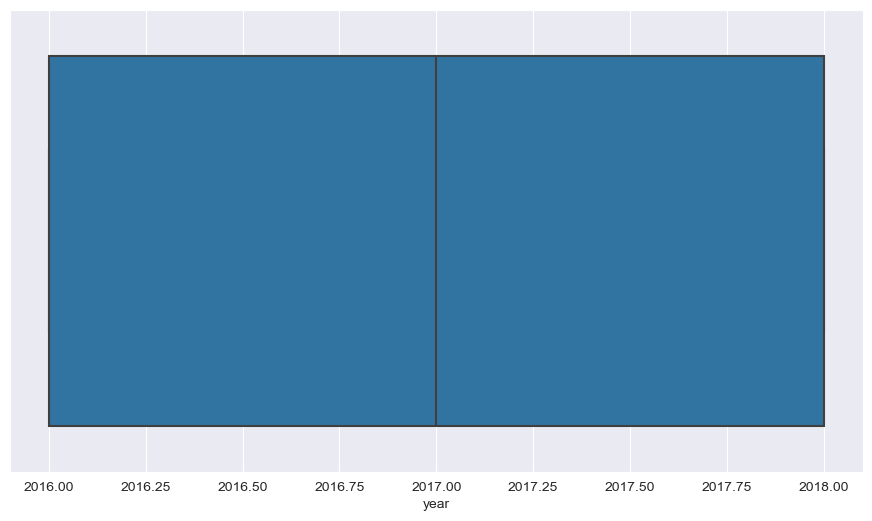

In [155]:
#boxplot for year variable
plt.figure(figsize=(11,6))
sns.boxplot(x = train['year']);

we notice that there are not outliers in the year column since all our data is within the lower and upper limit

In [156]:
#check for outliers in household_size columnusing the interquatile range calculation
Q1, Q3 = np.percentile(train['household_size'], [25,75]) 
IQR = Q3-Q1 
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -2.5
up_limit is 9.5


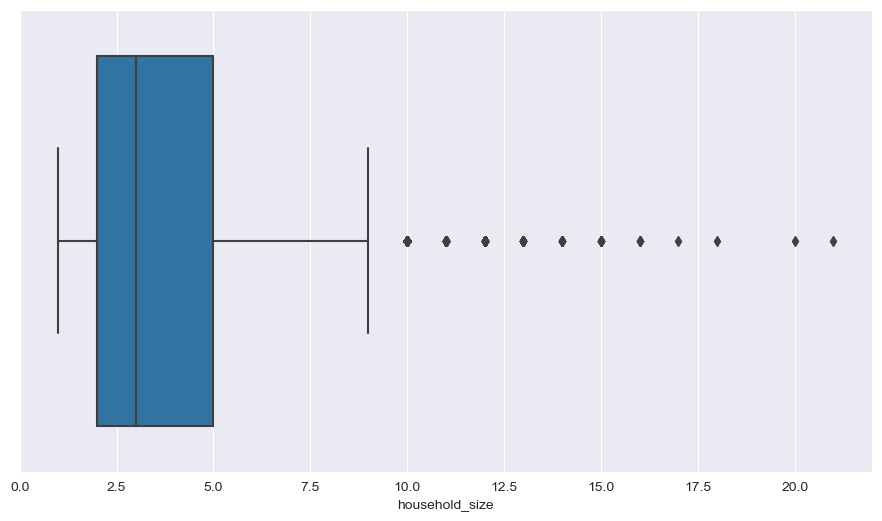

In [157]:
#box plot to investigate outliers in the dataset
plt.figure(figsize=(11,6))
sns.boxplot(x = train['household_size']);

We notice that household_size contains outliers from values that are above 10. Considering that this is an African setup, we can have homes that have a house hold size of more than 20 especially the polygamous homes. We will therefore not drop the outliers

In [158]:
#check for outliers in age_of_respondent columnusing the interquatile range calculation
Q1, Q3 = np.percentile(train['age_of_respondent'], [25,75]) 
IQR = Q3-Q1 
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -8.5
up_limit is 83.5


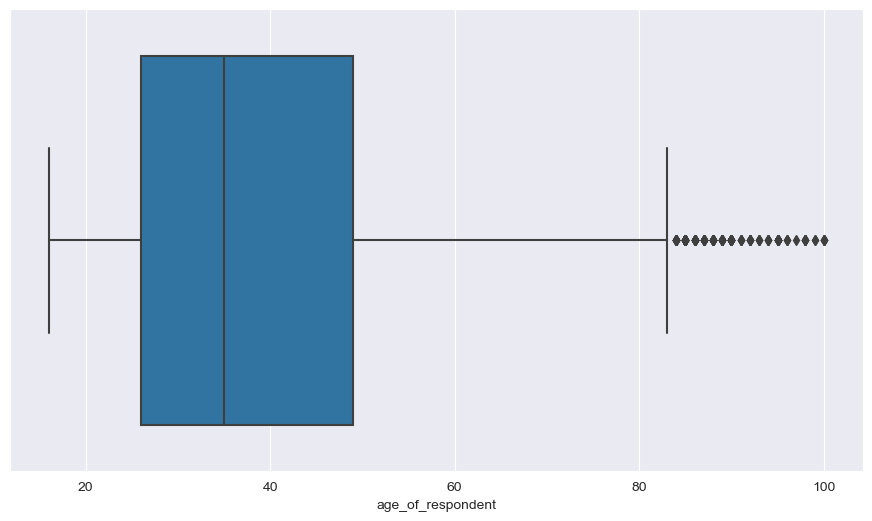

In [159]:
#checking for outliers in the age_of_respondent column usig a boxplot
plt.figure(figsize=(11,6))
sns.boxplot(x = train['age_of_respondent']);

Ages above 84 are seen to be outliers.We will not drop the outliers since there few people who can live beyond 84 years in Africa

### 3.0 Explorartory Data Analysis

#### 3.1 Univariate Data Analysis

We will begin with checking the distribution of the bank_account, our target variable.

In [160]:
#do a value counts on the bank_account column
train['bank_account'].value_counts(normalize=True)

No     0.859208
Yes    0.140792
Name: bank_account, dtype: float64

Below is a barplot to show the class balancing in our target variable

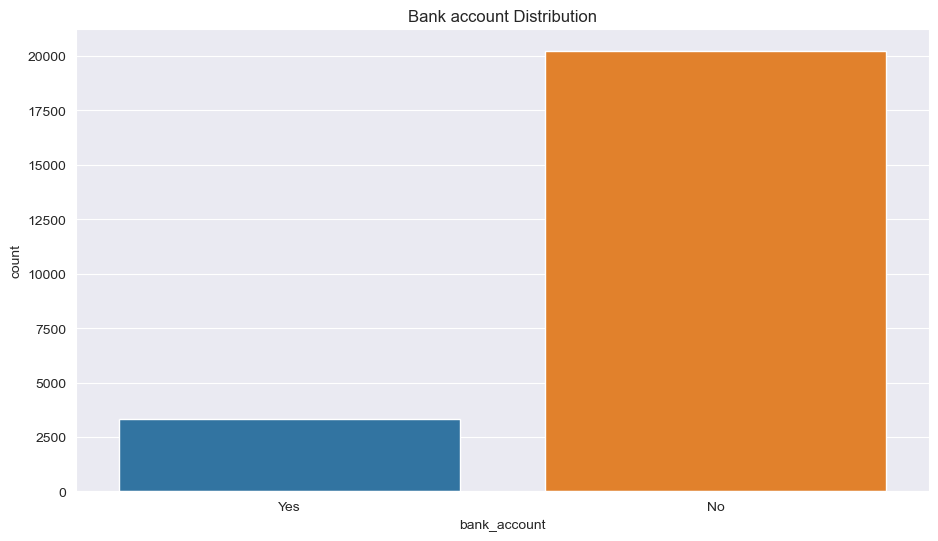

In [161]:
#plot a count plot on the bank_account column
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='bank_account')
plt.title("Bank account Distribution");

We notice a class imbalance in our target variable. The 'Yes' class is 14% and the 'No' class is 86% of the whole data set.

##### Study the distribution of Countries in the data set

In [162]:
#do a value counts on the bank_account column
train['country'].value_counts(normalize=True)

Rwanda      0.371323
Tanzania    0.281415
Kenya       0.257949
Uganda      0.089313
Name: country, dtype: float64

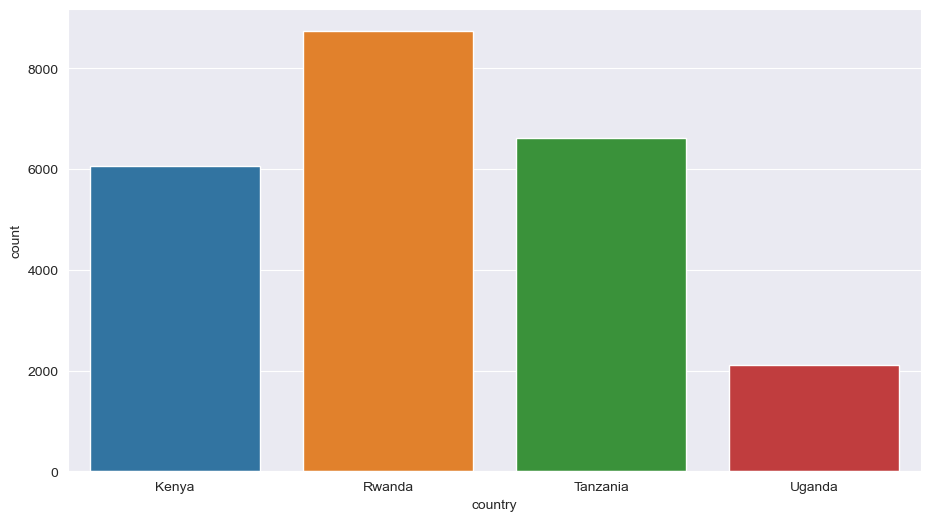

In [163]:
#check the distribution of countries in the dataset
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='country');

We observe that that we have four countries-Kenya and Rwanda. Rwanda has the majority entries followed by Tanzania, Kenya, then Uganda respectively

##### Check the distribution of gender in the dataset using a countplot

In [164]:
#check value_counts for the gender_of_respondent column
train['gender_of_respondent'].value_counts(normalize=True)

Female    0.589908
Male      0.410092
Name: gender_of_respondent, dtype: float64

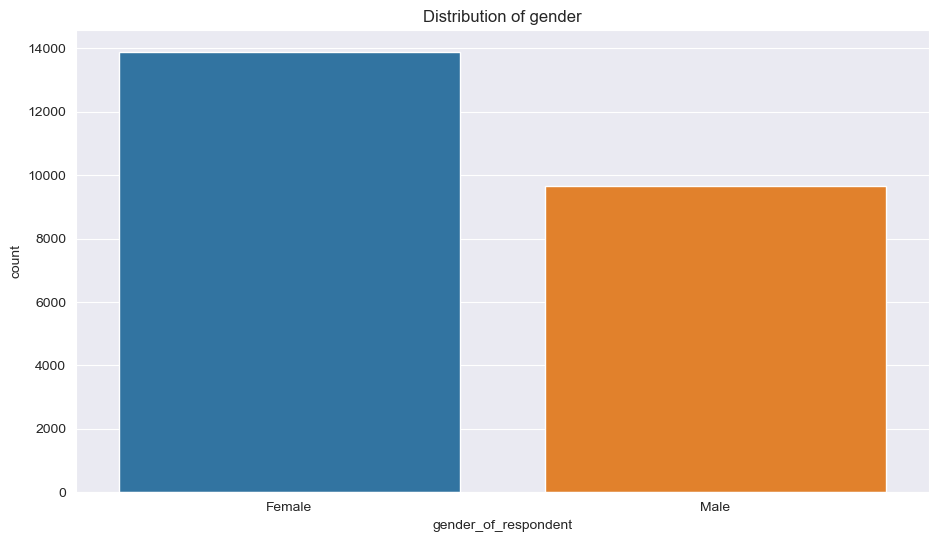

In [165]:
#check the distribution of coutries in the dataset
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='gender_of_respondent')
plt.title("Distribution of gender");

We notice that we have slightly more females than the males in the dataset 58% to 42% respectively

##### Investigate the distribution of age in the dataset using a histogram

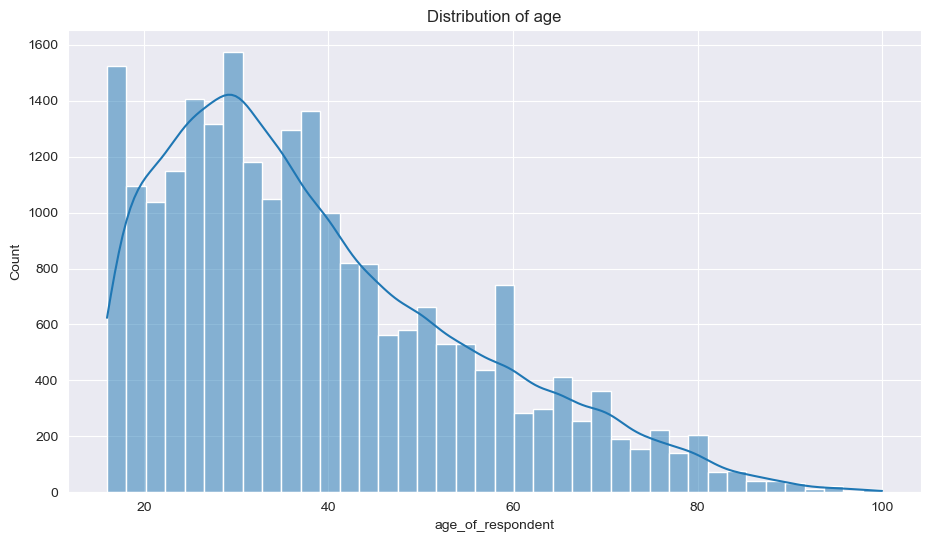

In [166]:
#check the distribution of age_of_respondent' in the dataset
plt.figure(figsize=(11,6))
sns.histplot(data=train, x='age_of_respondent', bins=40,kde=True)
plt.title("Distribution of age");

:We notice that most people are between the age of 15 and 60. Very few people are between the ages of 65 and above

##### Check the distribution of education level using a countplot

In [167]:
#check value_counts for the education_level column
train['education_level'].value_counts(normalize=True)

Primary education                  0.543743
No formal education                0.191932
Secondary education                0.179519
Tertiary education                 0.049184
Vocational/Specialised training    0.034135
Other/Dont know/RTA                0.001488
Name: education_level, dtype: float64

We note that we have very few people categorized with 'Other/Dont know/RTA' we will therefore combine this category with "No formal education"

In [168]:
train['education_level'] = train['education_level'].replace("Other/Dont know/RTA","No formal education")

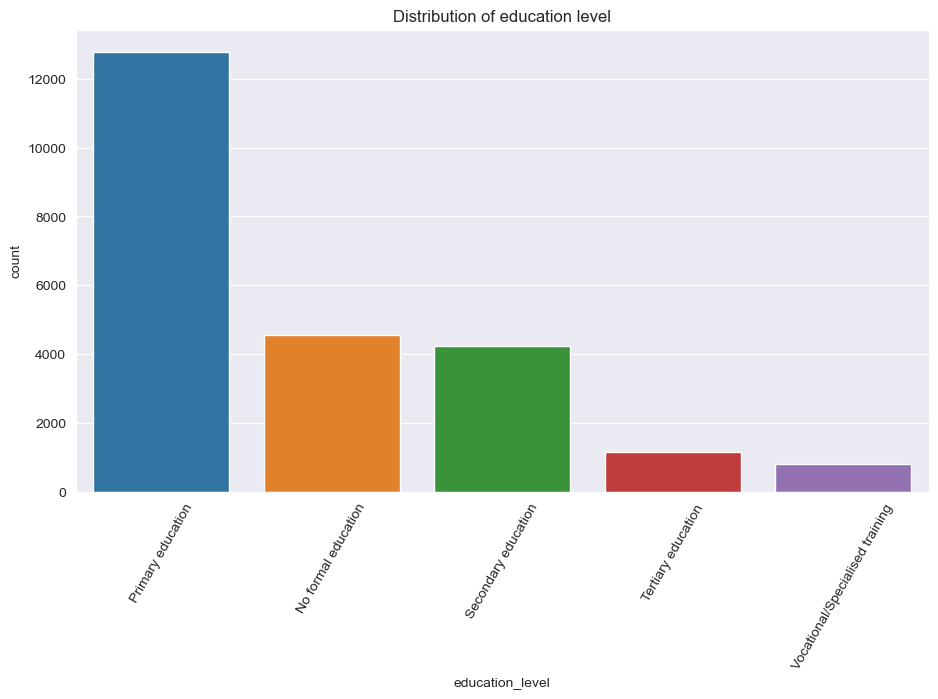

In [169]:
#check the distribution of education_level in the dataset
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='education_level', order = train['education_level'].value_counts().index)
plt.xticks(rotation=60)
plt.title("Distribution of education level");

We notice that most people have primary education only(54%), 19% do not have a formal education, 18% seconaday education,  5% have tertairy education, 3% have a Vocational/Specialised training

##### Check the distribution of location type

In [170]:
#check value_counts for the location_type column
train['location_type'].value_counts(normalize=True)

Rural    0.609718
Urban    0.390282
Name: location_type, dtype: float64

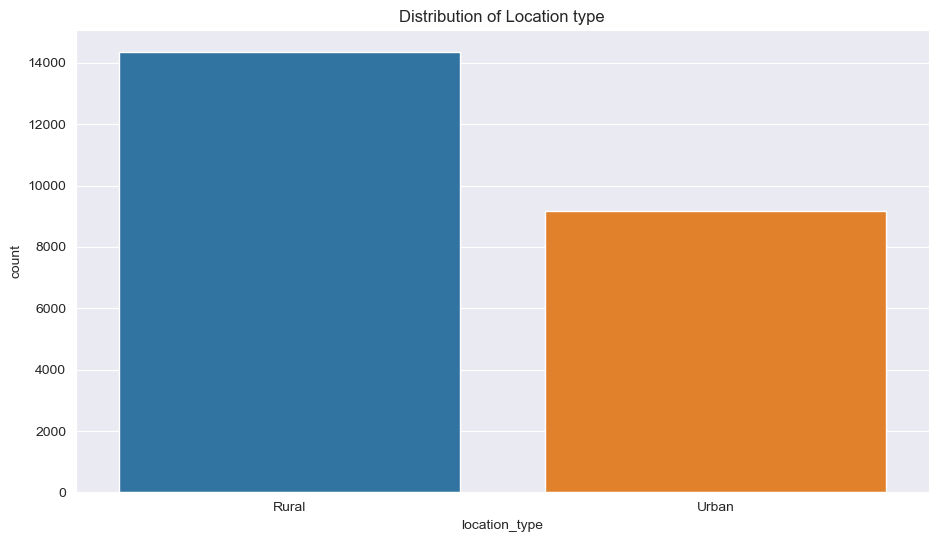

In [171]:
#plot a countplot of the distribution of location type
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='location_type')
plt.title("Distribution of Location type");

We observe that there are more people  residing in rural areas compared to those in urban areas

##### Check the distribution of cell phone access in the dataset

In [172]:
#check value_counts for the location_type column
train['cellphone_access'].value_counts(normalize=True)

Yes    0.741966
No     0.258034
Name: cellphone_access, dtype: float64

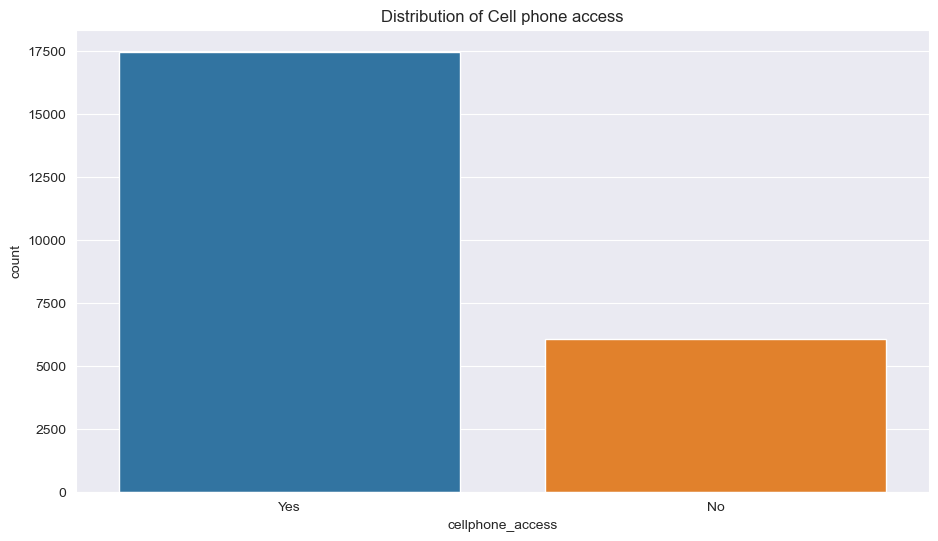

In [173]:
#plot a countplot of the distribution of location type
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='cellphone_access')
plt.title("Distribution of Cell phone access");

From the above plot we not that most people have access to a cell phone(74%)

##### Check the distribution of household size

In [174]:
#check value_counts for the household_sizee column
train['household_size'].value_counts(normalize=True)

2     0.222284
3     0.166638
4     0.147679
1     0.129952
5     0.121280
6     0.089100
7     0.059514
8     0.031925
9     0.015431
10    0.008077
11    0.002933
12    0.002891
13    0.001063
15    0.000468
14    0.000425
16    0.000170
21    0.000043
18    0.000043
17    0.000043
20    0.000043
Name: household_size, dtype: float64

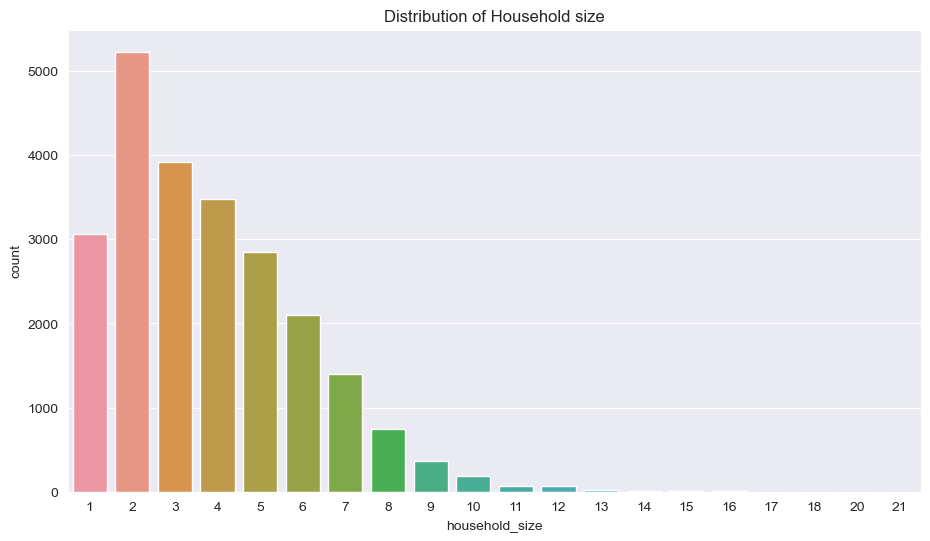

In [175]:
#plot a countplot of the distribution of location type
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='household_size')
plt.title("Distribution of Household size");

We notice that most people have a household size of between 1 and 7 , 2 is the highest while 21 has the smallest count

#### 3.2 Bivariate Data Analysis

Here we check how various features relate to each other

##### Check the distribution of bank_account in different countries

In [176]:
#perform a groupby on country and bank_account column
train.groupby(['country', 'bank_account'])['bank_account'].count()

country   bank_account
Kenya     No              4547
          Yes             1521
Rwanda    No              7732
          Yes             1003
Tanzania  No              6013
          Yes              607
Uganda    No              1920
          Yes              181
Name: bank_account, dtype: int64

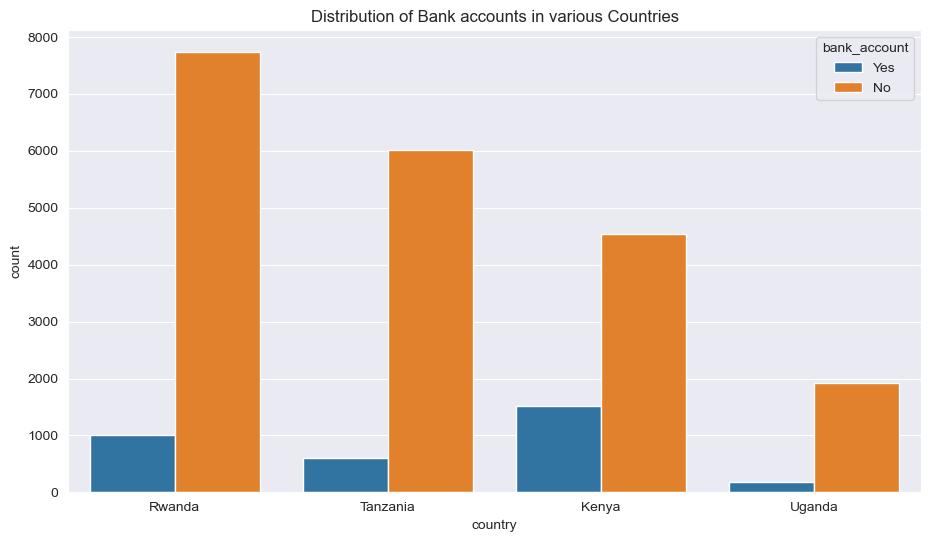

In [177]:
#check the distribution of coutries in the dataset
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='country', hue='bank_account',  order = train['country'].value_counts().index)
plt.title("Distribution of Bank accounts in various Countries");

We notice that Kenya has more people with bank accounts (about 1500)compared to Rwanda, Uganda and Tanzania.Rwanda on the other hand has highest number of people who dont have a bank accounts. Uganda has the least people who dont have to bank accounts

##### Check the distribution of bank_account ownership in relation to gender and country

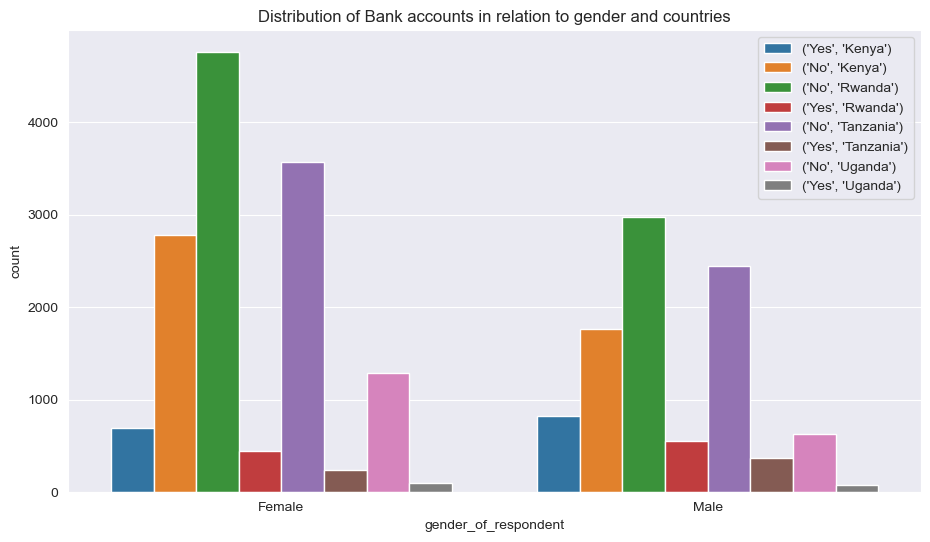

In [178]:
#check the distribution of bank_account in relation to gender_of_respondent in the dataset
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='gender_of_respondent', hue=train[['bank_account','country']].apply(tuple, axis=1),  order = train['gender_of_respondent'].value_counts().index)
plt.title("Distribution of Bank accounts in relation to gender and countries");

We note that we have more males with bank accounts compared to female in Kenya, and Tanzania. Rwandwa and Uganda have an almost equal number for both males and females owning bank accounts.
The number of females who do not have bank accounts for the 4 countries is higher than that of males


##### Investigate the distribution of of bank accounts in relation to education level

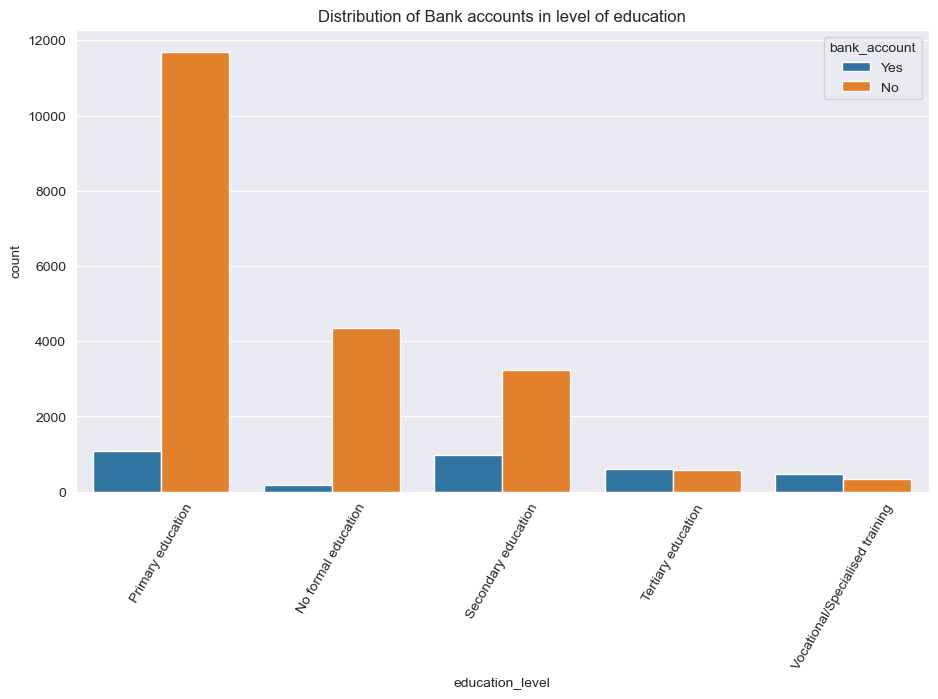

In [179]:
#check the distribution of coutries in the dataset
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='education_level', hue='bank_account',  order = train['education_level'].value_counts().index)
plt.xticks(rotation=60)
plt.title("Distribution of Bank accounts in level of education");

We note that people with secondary education have more bank accounts followed by people with primary education.
People with tertiary and specialed education also have more bank accounts compared to the total number of people in these two category.
people with no formal education have fewest bank accounts.


##### Check the distribution of bank account ownership in relation to location type

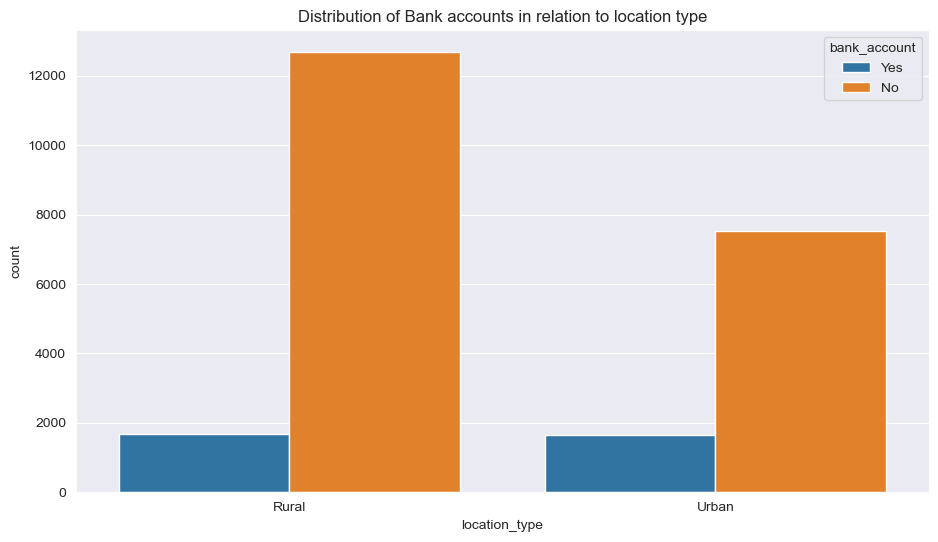

In [180]:
#check the distribution of bannk acconts amongst location type
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='location_type', hue='bank_account',  order = train['location_type'].value_counts().index)
plt.title("Distribution of Bank accounts in relation to location type");

We have similar number of people having bank accounts in urban and rural areas.
A higher number of people have with no bank accounts is noted in rural ares compared to urban

##### Investigate whether people with access to cell pones have bank accounts

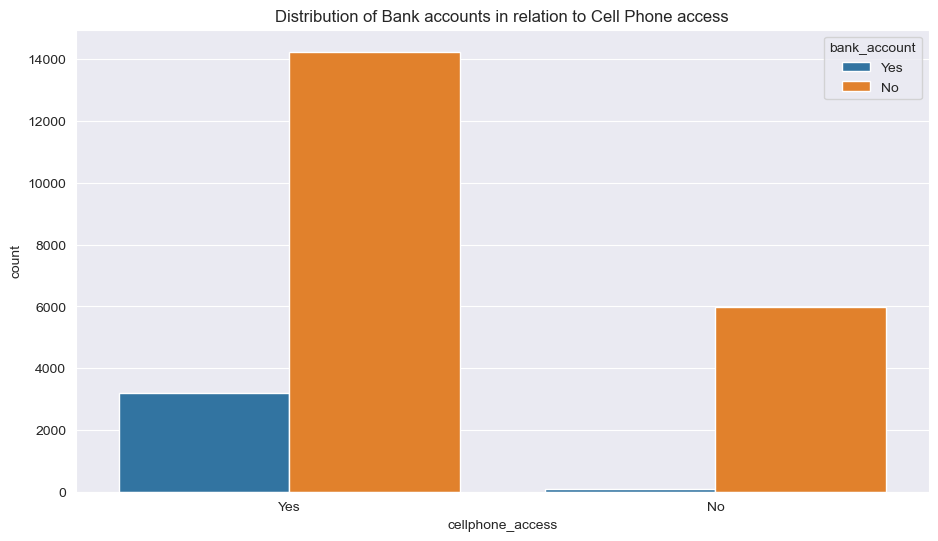

In [181]:
#check the distribution of bank accounts in relation to cell phone access in the dataset
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='cellphone_access', hue='bank_account',  order = train['cellphone_access'].value_counts().index)
plt.title("Distribution of Bank accounts in relation to Cell Phone access");

we have a higer number(about 3500 ) of people  that have cell phones and have a bank account compared to those that dont have access to a cell phone(about 100 people).

##### Check which location has the highest number of cell phone access

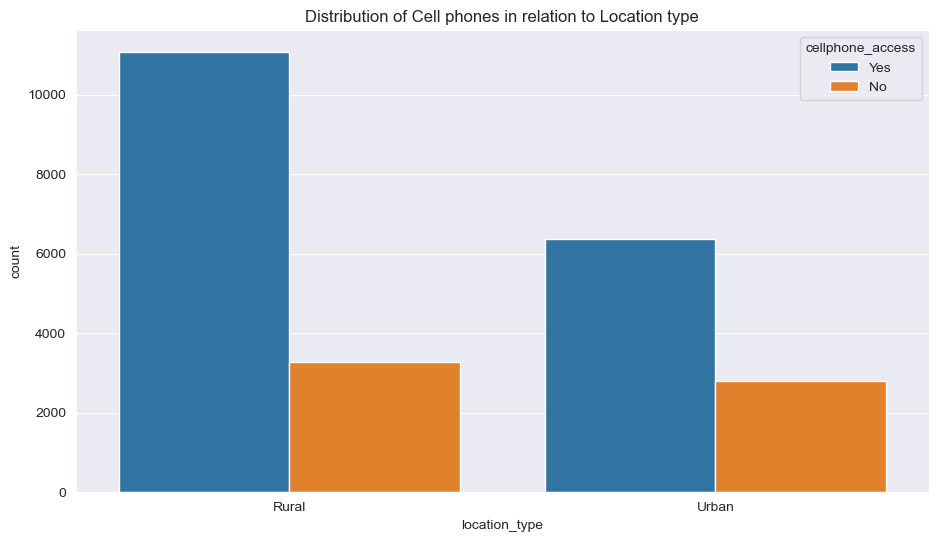

In [182]:
#check the distribution of cell phone  access in relation to location type
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='location_type', hue='cellphone_access',  order = train['location_type'].value_counts().index)
plt.title("Distribution of Cell phones in relation to Location type");

We notice that we have a higher number of people with cell phones in the rural areas compared to urban areas.We also notice that we have a higher number of people without cell phones in rural settlement compared to urban settlement. This is informed by the fact that we have more people staying in the rural area compare to urban area. 

##### Investigate where people with large families stay

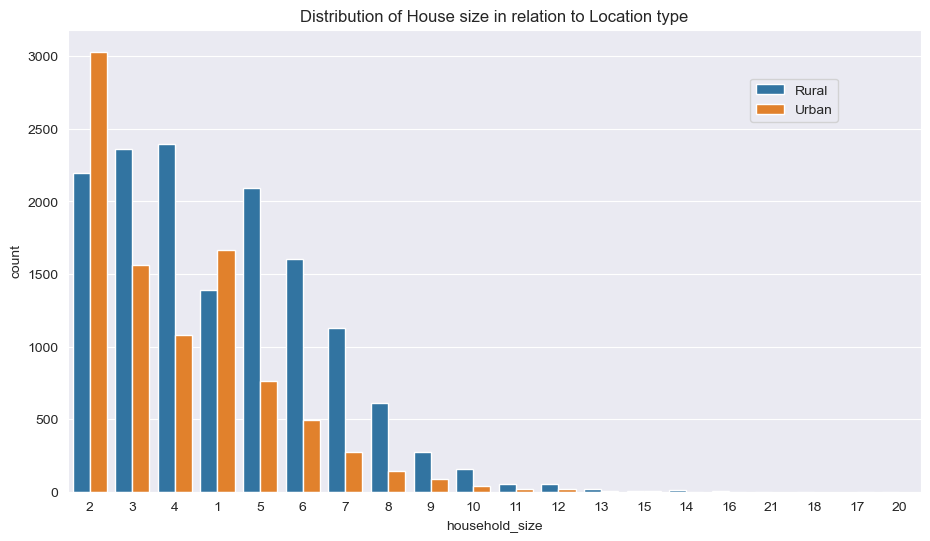

In [183]:
#check the distribution of household_size amongst location type
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='household_size', hue='location_type',  order = train['household_size'].value_counts().index)
plt.title("Distribution of House size in relation to Location type")
plt.legend(loc=(0.8,0.8));

As the household size increases there is a shift in settlement from urban to rural

##### Check the distribution of household size in  in relation to bank account ownership

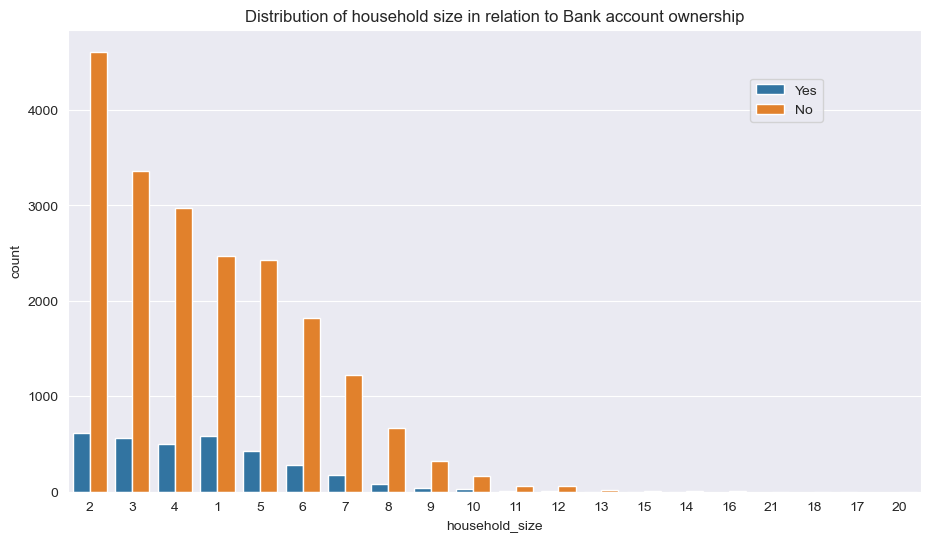

In [184]:
#check the distribution of household_size inrelation to bank_account
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='household_size', hue='bank_account',  order = train['household_size'].value_counts().index)
plt.title("Distribution of household size in relation to Bank account ownership")
plt.legend(loc=(0.8,0.8));

Household sizes 1 to 4 have a higher number of account holders compared to the larger households

##### Inspect the marital status in the household size

Check for the cardinality of the values in the marital status column

In [185]:
#value counts on marital status column
train['marital_status'].value_counts()

Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: marital_status, dtype: int64

We note that we have a small number of people who are categorized as "Dont Know".

We will merge this category with Divorced/Separated.

In [186]:
train['marital_status'] = train['marital_status'].replace('Dont know','Divorced/Seperated')

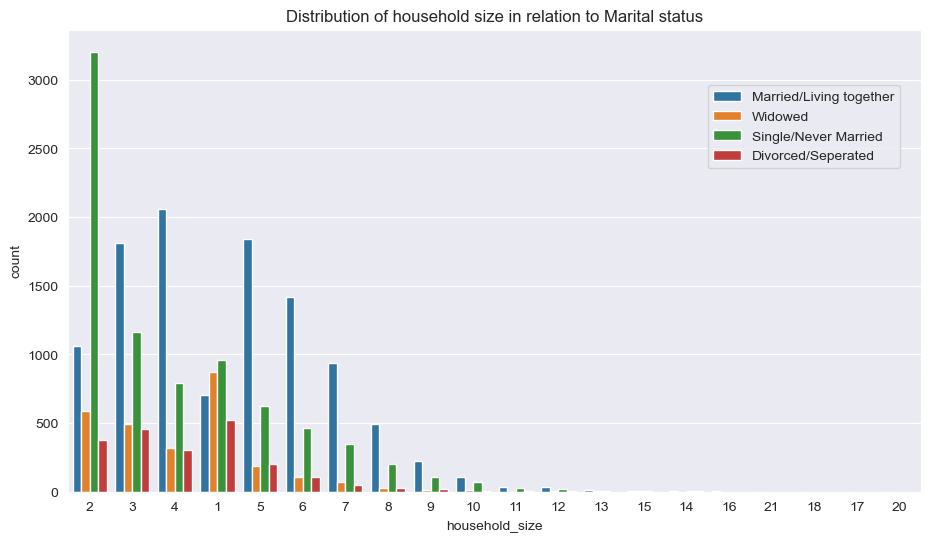

In [187]:
#check the distribution of household_size inrelation to marital status
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='household_size', hue='marital_status',  order = train['household_size'].value_counts().index)
plt.title("Distribution of household size in relation to Marital status")
plt.legend(loc=(0.75,0.7));

We note that most people various households are married/living together, followed by single/never married,  windowed  then divorced/separated.

Genarally we have household size of 4 with the highest number of married people the 5, 3,6, 2, the lowest is 12.

We also note that a household size of 1 has married category.This may imply that some married couples live in separate places

##### Check the distribution of the Marital Status of the respondents in relation to back account owernership

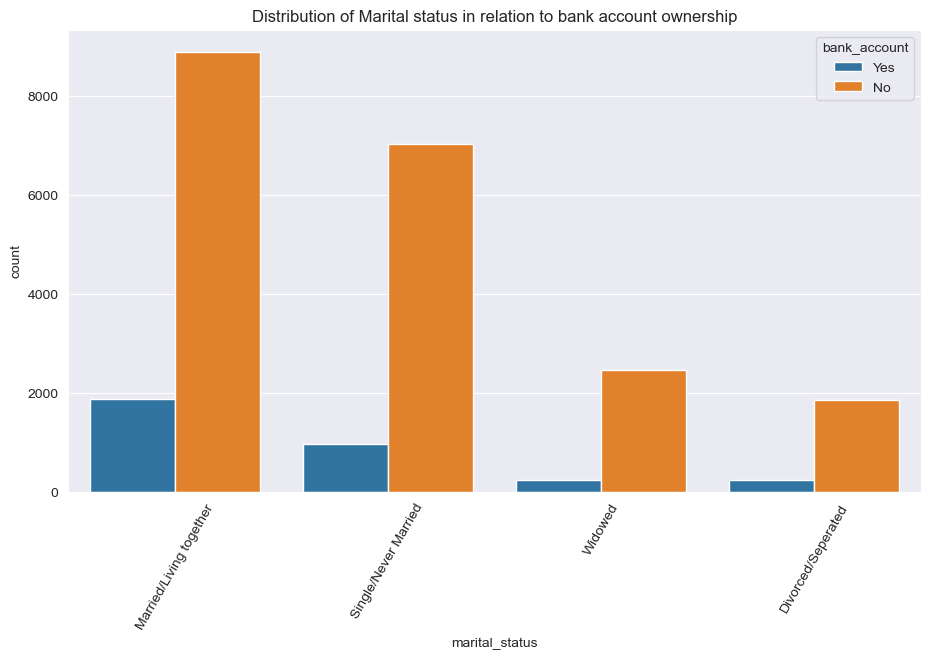

In [188]:
#check the distribution of marital_status in relation to bank_account
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='marital_status', hue='bank_account',  order = train['marital_status'].value_counts().index)
plt.title("Distribution of Marital status in relation to bank account ownership")
plt.xticks(rotation=60);

The highest bank accounts are owned by married couples while divorced or separated have the least
Generally most people do not own bank accounts regardless of their marital staus.

##### Check the distribution of the age of the respondents in relation to bank account owernership

From the univariate anlysis of the age_of_respondent column, we notice that we have a much larger number of unique values(81) so it will be difficult to plot a count plot of its distribution in relation to bank account ownership.

To handle this, we will create a new column called age_bands off of the age_of_respondent column using pandas cut method to bin the values then make visualization from it

In [189]:
# create bins with a width of 20
plt.figure(figsize=(11,6))
bins = [1, 20, 40, 60, 80, 100]
# create labels for each bin
labels = ['[1, 20]', '[21, 40]', '[41, 60]', '[61, 80]', '[81, 100]']
# use cut to group the ages into the bins 
train['age_bands'] = pd.cut(train['age_of_respondent'], bins=bins, labels=labels);

<Figure size 1100x600 with 0 Axes>

In [190]:
#confirm that the age bands have been created
train['age_bands'].value_counts()

[21, 40]     12061
[41, 60]      6005
[1, 20]       2620
[61, 80]      2499
[81, 100]      339
Name: age_bands, dtype: int64

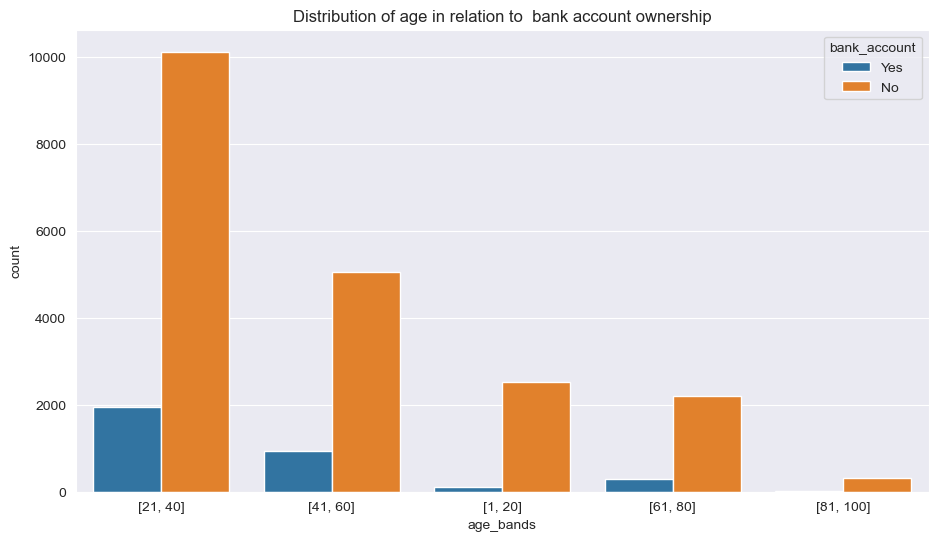

In [191]:
#plot distribution of age in relation to  bank account ownership
plt.figure(figsize=(11,6))
sns.countplot(data=train, x='age_bands', hue='bank_account', order = train['age_bands'].value_counts().index);
plt.title("Distribution of age in relation to  bank account ownership");

We note that people between the ages of 21 and 40 have the highest number of bank account ownership followed by people between ages of 41 and 60

### 4.0 Feature Engineering

In this section we preprocess the data to ready it for modeling. This involves separating the target variable from the features,
converting categorical columns to numerical,feature selection and scaling of the data.

### 4.1 Data Preprocessing

##### separate independent features from target variable(bank_account)

In [192]:

#get the target variable
y = train['bank_account']
#get predictor features.
#we will also drop the uniqueid since it will not help in our prediction.its just a unique counter of our features
X = train.drop(['bank_account', 'uniqueid'], axis=1)

In [193]:
#check the shape of X and y
print("y shape:", y.shape)
print("X shape:", X.shape)

y shape: (23524,)
X shape: (23524, 12)


We have one column in y column our target variable and 12 columns in X our predictor features. Both X and y have 8735 rows

From our EDA, we notice that most of our columns including our target variable are in categrical format. We have to convert them to numerical for us to be able to perform modeling

##### convert the target variable(bank_account) to numerical type
Our target variable currently has two categories:-yes and no. We need to convert these int 1 for yes and 0 for no using Label Encoding technique


In [194]:
#import the LabelEcoder
from sklearn.preprocessing import LabelEncoder

# instantaite the Label enconder
le = LabelEncoder()
#fit and transform the target column
y = le.fit_transform(y)
#preview the bank_account column to confirm the changes
y

array([1, 0, 1, ..., 0, 0, 0])

##### convert the categorical features into numerical type

We will first select features that categorical then convert them into numerical, convert integer columns to float types then concatenate them with the features that are already numerical

In [195]:
#get numeric columns 
numeric_cols =  X._get_numeric_data()
#convert them to float type
numeric_cols_to_float = numeric_cols.astype('float')
#preview to confirm changes
numeric_cols_to_float.head()

,year,household_size,age_of_respondent
0,2018.0,3.0,24.0
1,2018.0,5.0,70.0
2,2018.0,5.0,26.0
3,2018.0,5.0,34.0
4,2018.0,8.0,26.0


In [196]:
#check the shape of the numeric_cols_to_float dataframe
numeric_cols_to_float.shape

(23524, 3)

In [197]:
#get categorical columns 
categoricals = X.select_dtypes(include="object")
# we will use methods use mapping and pandas get dummies to convert categorical columns into numerical formats.
# we will loop through categorical if the value counts is more than 2 we use pd.get_dummies, if its 2 and has ordinal
#properties we will use ordinal encoding
ordinals = []
cats = []
for col in categoricals:
    if all(x in ["Yes","No", "Female","Male", "Urban","Rural"] for x in X[col].unique()):
        ordinals.append(col)
    else:
        cats.append(col)
#preview ordinals and categoricals
print("Ordinal columns:", ordinals)
print("categorical columns:", cats)

Ordinal columns: ['location_type', 'cellphone_access', 'gender_of_respondent']
categorical columns: ['country', 'relationship_with_head', 'marital_status', 'education_level', 'job_type']


In [198]:
# #convert the ordinals using label encoding

# fit and transform ordinal data using label encoder
encoded_ordinals = X[ordinals].apply(le.fit_transform)

# preview the changes
encoded_ordinals.head()

,location_type,cellphone_access,gender_of_respondent
0,0,1,0
1,0,0,0
2,1,1,1
3,0,1,0
4,1,0,1


In [199]:
#check the shape of the ordinal dataframe
encoded_ordinals.shape

(23524, 3)

In [200]:
#convert the cateogrical columns using pandas get_dummies
encoded_cats = pd.get_dummies(X[cats], prefix_sep="_", drop_first=True)
#preview the changes
encoded_cats.head()

,country_Rwanda,country_Tanzania,country_Uganda,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Married/Living together,marital_status_Single/Never Married,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [201]:
##check the shape of the cats dataframe
encoded_cats.shape

(23524, 24)

In [202]:
#combine the numerical, ordinal and the one-hote encoded dataframes into 1 X

X = pd.concat([encoded_cats, numeric_cols_to_float, encoded_ordinals], axis=1)
#preview X
X.sample(5)

,country_Rwanda,country_Tanzania,country_Uganda,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,marital_status_Married/Living together,marital_status_Single/Never Married,...,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,year,household_size,age_of_respondent,location_type,cellphone_access,gender_of_respondent
5299,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,2018.0,5.0,38.0,1,1,1
10198,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,2016.0,7.0,35.0,0,1,0
6404,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,2016.0,4.0,26.0,0,1,0
4490,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,2018.0,1.0,29.0,1,1,1
20915,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,2017.0,3.0,90.0,1,0,1


In [203]:
#confirm that our dataframe merging happened without issues
X.isnull().sum()

country_Rwanda                                     0
country_Tanzania                                   0
country_Uganda                                     0
relationship_with_head_Head of Household           0
relationship_with_head_Other non-relatives         0
relationship_with_head_Other relative              0
relationship_with_head_Parent                      0
relationship_with_head_Spouse                      0
marital_status_Married/Living together             0
marital_status_Single/Never Married                0
marital_status_Widowed                             0
education_level_Primary education                  0
education_level_Secondary education                0
education_level_Tertiary education                 0
education_level_Vocational/Specialised training    0
job_type_Farming and Fishing                       0
job_type_Formally employed Government              0
job_type_Formally employed Private                 0
job_type_Government Dependent                 

In [204]:
#check the shape of the dataframe
X.shape

(23524, 30)

We see that the data frame concatenation went well as we do not have null values

In [205]:
#nomalize data using the MinNax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_norm = scaler.fit_transform(X)
X_norm

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 1.]])

### 4.2 Feature selection

Here we will use Random Fosest a subset of is a category of embedded methods of feature selection. Embedded methods combine the qualities of both filter and wrapper methods which makes it highly accurate, better generalization and interpretable.

In [206]:
#import random forest nd the n=best feature selector
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [207]:
# we have to split the data first into train and test so that we do feature selection only on the train set
#import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X_norm, y,test_size=0.3, random_state=101)
print(X_train.shape, y_train.shape)

(16466, 30) (16466,)


In [208]:
#specify the random forest instance, indicating the number of trees
#then use selectFromModel object from sklearn to automatically select the features.
rfc = RandomForestClassifier(n_estimators = 100, random_state=101)
sfm = SelectFromModel(rfc,threshold='median')
# Fit the SelectFromModel object to the data
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=101),
                threshold='median')

SelectFromModel will select those features which importance is greater than the mean importance of all the features by default, but we can alter this threshold if we want.

To see which features are important we can use get_support method on the fitted model.

In [209]:
# Get the selected features
#convert X_train to a datafrme to get the columns
X_train_df = pd.DataFrame(X_train, columns=X.columns)
selected_feat= X_train_df.columns[(sfm.get_support())]
len(selected_feat)

15

We get 15 as the number of selected features. Lets print the selected features

In [210]:
# Print the selected features
print(selected_feat)

Index(['relationship_with_head_Head of Household',
       'marital_status_Single/Never Married',
       'education_level_Primary education',
       'education_level_Secondary education',
       'education_level_Tertiary education',
       'education_level_Vocational/Specialised training',
       'job_type_Formally employed Government',
       'job_type_Formally employed Private', 'job_type_Self employed', 'year',
       'household_size', 'age_of_respondent', 'location_type',
       'cellphone_access', 'gender_of_respondent'],
      dtype='object')


In [211]:
# Fit the random forest classifier on the selected features
rfc.fit(X_train_df[selected_feat], y_train)
# Get the feature importances
feature_importances = rfc.feature_importances_
# Create a pandas dataframe of feature importances
fi_df = pd.DataFrame({'feature': selected_feat, 'importance': feature_importances})
# Sort the dataframe by feature importance
fi_df = fi_df.sort_values('importance', ascending=False)

# Print the feature importances
fi_df

,feature,importance
11,age_of_respondent,0.398914
10,household_size,0.154172
7,job_type_Formally employed Private,0.052663
9,year,0.051985
4,education_level_Tertiary education,0.047840
6,job_type_Formally employed Government,0.046081
5,education_level_Vocational/Specialised training,0.038607
12,location_type,0.036769
13,cellphone_access,0.030813
8,job_type_Self employed,0.027024


Plot the distribution of importance

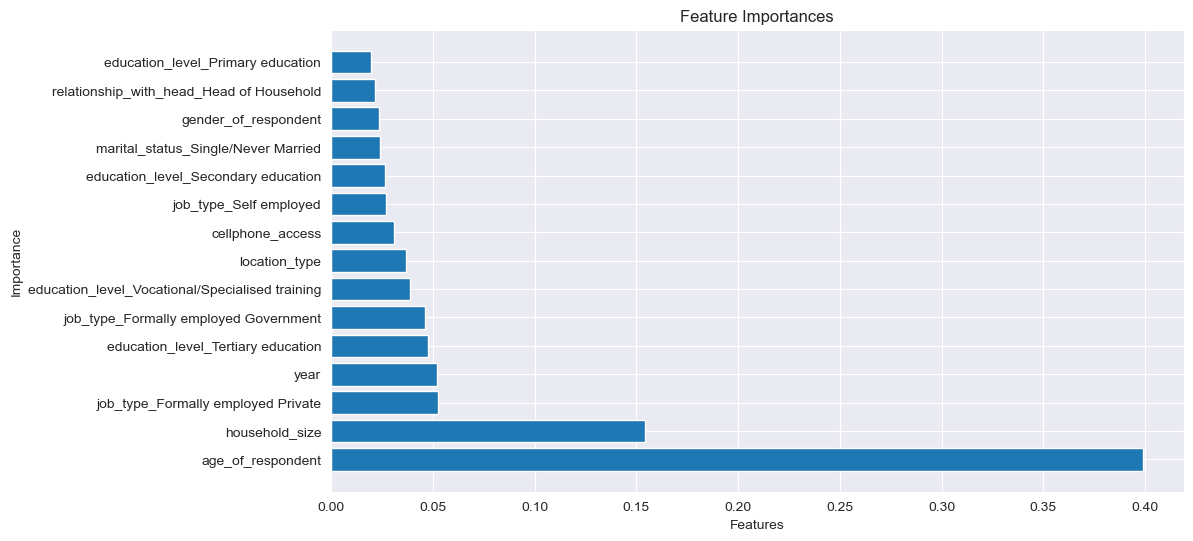

In [212]:
# Create a bar chart of feature importances
plt.figure(figsize=(11,6))
plt.barh(fi_df['feature'], fi_df['importance'])
# Add axis labels and title
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
# Show the plot
plt.show()

In [213]:
# Transform the training and testing data to include only the selected features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

We can try to model with the important features

### 5.0 Modeling and Experiments

In this section, we try out various algorithms and resampling techniques

##### Random Forest

In [214]:
# Create a random forest model model
rfc = RandomForestClassifier(n_estimators=100, random_state=101, class_weight='balanced')
# Fit the model to the training data using the selected features
rfc.fit(X_train_selected, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

Evaluate the performance of the model on the testing data:

In [215]:
# Make predictions on the testing data
y_pred_rfc = rfc.predict(X_test_selected)

print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      6022
           1       0.45      0.40      0.42      1036

    accuracy                           0.84      7058
   macro avg       0.67      0.66      0.66      7058
weighted avg       0.83      0.84      0.84      7058



<Figure size 1920x1440 with 0 Axes>

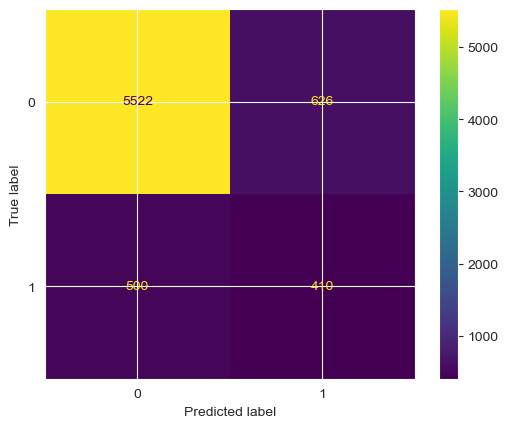

In [216]:
plt.figure(dpi=300)
ConfusionMatrixDisplay.from_predictions(y_pred_rfc , y_test);

We notice that our model is getting a ggod accurcy but not classiying well as seen from the F1 score and the confusion matrix. We will try out another model

##### Adaboost

In [217]:
#import adaboost and gradient boost from ensemble
from sklearn.ensemble import AdaBoostClassifier

In [218]:
# Create an adaboost model
adac = AdaBoostClassifier()
# Fit the model to the training data using the selected features
adac.fit(X_train_selected, y_train)


AdaBoostClassifier()

In [219]:
# Make predictions on the testing data
y_pred_adac = adac.predict(X_test_selected)

#check the performance of the model using the classification report
print(classification_report(y_test, y_pred_adac))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6022
           1       0.70      0.28      0.40      1036

    accuracy                           0.88      7058
   macro avg       0.79      0.63      0.66      7058
weighted avg       0.86      0.88      0.85      7058



<Figure size 1920x1440 with 0 Axes>

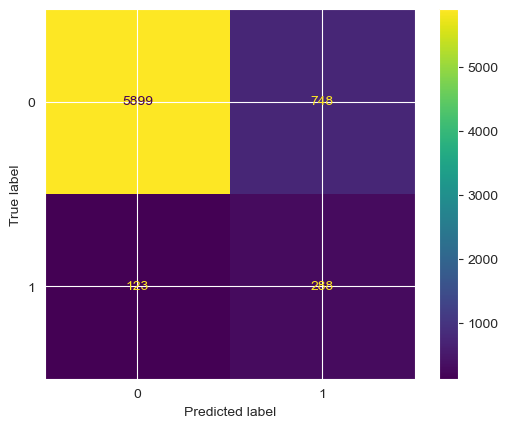

In [220]:
plt.figure(dpi=300)
ConfusionMatrixDisplay.from_predictions(y_pred_adac, y_test);

We notice that our model is getting a ggod accurcy but not classiying well as seen from the F1 score and the confusion matrix. We will try out another model

##### XGBoost

In [221]:
#import the xgb classifier
from xgboost import XGBClassifier

In [222]:
# instantiate the classifier
xgbc = XGBClassifier()
# Fit the model to the training data using the selected features
xgbc.fit(X_train_selected, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [223]:
# Make predictions on the testing data
y_pred_xgbc = xgbc.predict(X_test_selected)

print(classification_report(y_test, y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6022
           1       0.67      0.34      0.45      1036

    accuracy                           0.88      7058
   macro avg       0.78      0.66      0.69      7058
weighted avg       0.86      0.88      0.86      7058



<Figure size 1920x1440 with 0 Axes>

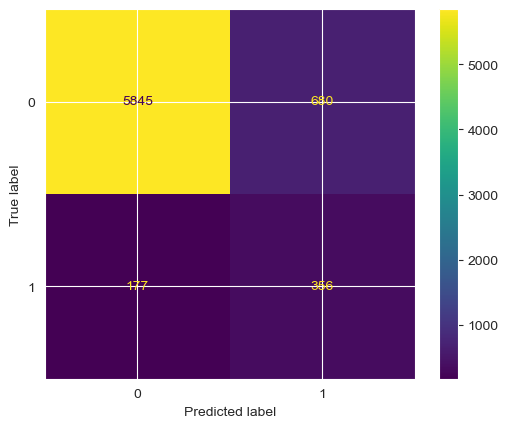

In [224]:
plt.figure(dpi=300)
ConfusionMatrixDisplay.from_predictions(y_pred_xgbc , y_test);

We notice that our model is getting a ggod accurcy but not classiying well as seen from the F1 score and the confusion matrix. We will try to solve the issue of class imbalance and see if that improves our model performance.

### 6.0 Dealing with class imbalance in target variable

##### SMOTE
SMOTE creates new synthetic minority samples instead of copy pasting the already available data points.

In [225]:
# Smote oversampling
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score
# summarize class distribution
print(Counter(y_train))

# define oversampling strategy
oversampler = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = oversampler.fit_resample(X_train_selected, y_train)

# summarize class distribution
print(Counter(y_train_SMOTE))

Counter({0: 14190, 1: 2276})
Counter({0: 14190, 1: 14190})


##### Remodel with Random Forest with hyper paraneter tuning

In [226]:
# Create a random forest model model
rfc_os = RandomForestClassifier(random_state=101, class_weight='balanced')
# Fit the model to the training data using the selected features
#set the parameters for grid search
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'criterion':['gini','entropy'],
    'max_features': ['sqrt', 'log2', 'auto'],
    'max_depth': [5, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
grid_search_rf = GridSearchCV(rfc_os, param_grid=param_grid)
grid_search_rf.fit(X_train_SMOTE, y_train_SMOTE)
print(grid_search_rf.best_estimator_)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       max_features='sqrt', max_leaf_nodes=9, n_estimators=25,
                       random_state=101)


In [228]:
# Make predictions on the testing data
y_pred_fr_os = grid_search_rf.predict(X_test_selected)

# Calculate accuracy, precision, recall, and F1-score
print(classification_report(y_test, y_pred_fr_os))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      6022
           1       0.40      0.67      0.50      1036

    accuracy                           0.80      7058
   macro avg       0.67      0.75      0.69      7058
weighted avg       0.86      0.80      0.82      7058



<Figure size 1920x1440 with 0 Axes>

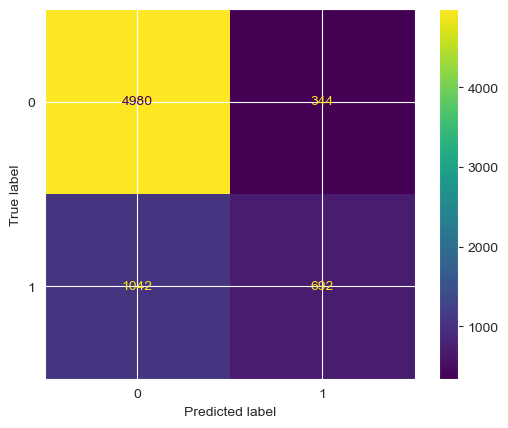

In [230]:
#plot a confusion matrix
plt.figure(dpi=300)
ConfusionMatrixDisplay.from_predictions(y_pred_fr_os, y_test);

We notice that the model performance is still not great as there is not much of an improvement from the model with unbalanced target.

##### Remodel Adaboost

In [231]:
# Create a random forest model model
adac_os = AdaBoostClassifier()
# Fit the model to the training data using the selected features
adac_os.fit(X_train_SMOTE, y_train_SMOTE)

AdaBoostClassifier()

In [232]:
# Make predictions on the testing data
y_pred_adac_os = adac_os.predict(X_test_selected)

# Calculate accuracy, precision, recall, and F1-score
print(classification_report(y_test, y_pred_adac_os))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      6022
           1       0.43      0.64      0.52      1036

    accuracy                           0.83      7058
   macro avg       0.68      0.75      0.70      7058
weighted avg       0.86      0.83      0.84      7058



<Figure size 1920x1440 with 0 Axes>

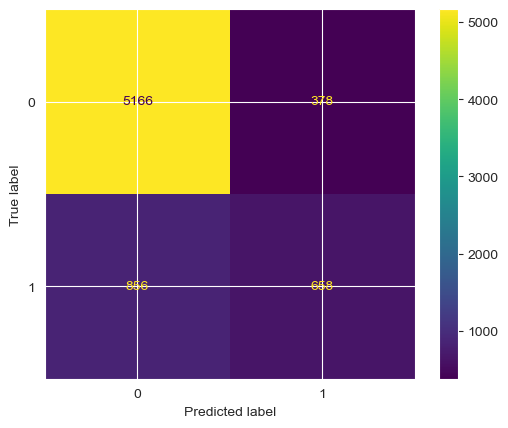

In [233]:
plt.figure(dpi=300)
ConfusionMatrixDisplay.from_predictions(y_pred_adac_os, y_test);

We notice that the model performance is still not great as there is not much of an improvement from the model with unbalanced target.

##### Remodel with XGBoost

In [234]:
# instantiate the classifier
xgbc_os = XGBClassifier()
# Fit the model to the training data using the selected features
xgbc_os.fit(X_train_SMOTE, y_train_SMOTE)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [235]:
# Make predictions on the testing data
y_pred_xgbc_os= xgbc_os.predict(X_test_selected)

# Calculate accuracy, precision, recall, and F1-score
print(classification_report(y_test, y_pred_xgbc_os))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6022
           1       0.62      0.37      0.47      1036

    accuracy                           0.87      7058
   macro avg       0.76      0.67      0.70      7058
weighted avg       0.86      0.87      0.86      7058



<Figure size 1920x1440 with 0 Axes>

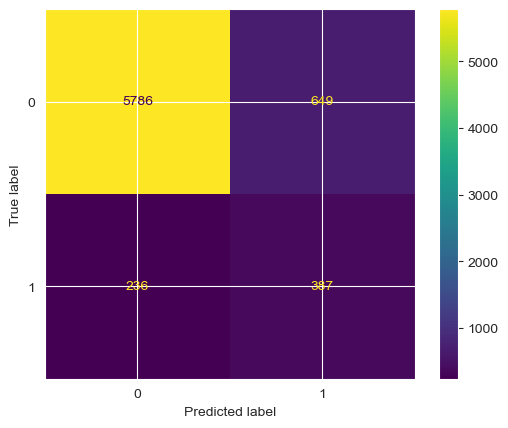

In [236]:
#plot a confusion matrix
plt.figure(dpi=300)
ConfusionMatrixDisplay.from_predictions(y_pred_xgbc_os, y_test);

We notice that the model performance is still not great as there is not much of an improvement from the model with unbalanced target.

###### Oversampling using sklearn's resample()

It works by performing  simple random oversampling by duplicating the minority class samples until they are equal in number to the majority class samples. This means that the resampled data will contain exact copies of the original minority class samples.Its disadvantage id that it could lead to model overfitting and poor generalization to new data.

In [237]:
#import resample from sklearns  util class
from sklearn.utils import resample
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score

# summarize class distribution
print("y_train:",Counter(y_train))


# Define the majority and minority classes
majority_class = X_train_selected[y_train == 0]
minority_class = X_train_selected[y_train == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class,
                              replace=True,
                              n_samples=majority_class.shape[0],
                              random_state=101)

# Combine the upsampled minority class with the majority class
X_train_oversampled = np.concatenate((majority_class, minority_upsampled))
y_train_oversampled = np.concatenate(([0] * majority_class.shape[0], [1] * majority_class.shape[0]))

# summarize class distribution
print("y_train_resampled:",Counter(y_train_oversampled))

y_train: Counter({0: 14190, 1: 2276})
y_train_resampled: Counter({0: 14190, 1: 14190})


##### Retrain a vanilla Random Forest with the oversampled data done by sklearns resample module

In [239]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_oversampled, y_train_oversampled, test_size=0.3, random_state=101)

# Check the shapes of the resulting arrays
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (19866, 15)
y_train shape: (19866,)
X_test shape: (8514, 15)
y_test shape: (8514,)


In [240]:
# Create a random forest model model
rfc_resampled = RandomForestClassifier(n_estimators=100, random_state=101, class_weight='balanced')
# Fit the model to the training data using the selected features
rfc_resampled.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [241]:
# Make predictions on the testing data
y_pred_rfc_resampled = rfc_resampled.predict(X_test)
#print the classification report
print(classification_report(y_test, y_pred_rfc_resampled))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      4259
           1       0.87      0.97      0.92      4255

    accuracy                           0.91      8514
   macro avg       0.92      0.91      0.91      8514
weighted avg       0.92      0.91      0.91      8514



<Figure size 1920x1440 with 0 Axes>

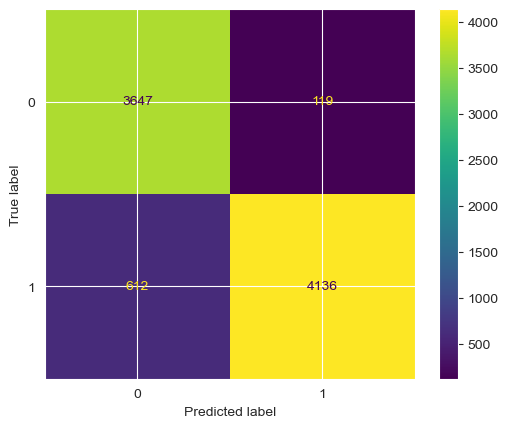

In [242]:
plt.figure(dpi=300)
ConfusionMatrixDisplay.from_predictions(y_pred_rfc_resampled , y_test);

We notice a huge improvement on the model performance on both accuracy and F1 score. The F1 score has leaped from 42% to 92%! 
We might need to check its performance on new data to for us to conclude that there is no overfitting

##### Retrain a vanilla Adaboost model with the oversampled data done by sklearns resample module

In [243]:
# Create an adaboost model
adac_resampled = AdaBoostClassifier()
# Fit the model to the training data using the selected features
adac_resampled.fit(X_train, y_train)

AdaBoostClassifier()

In [244]:
# Make predictions on the testing data
y_pred_adac_resampled = adac_resampled.predict(X_test)
#print the classification report
print(classification_report(y_test, y_pred_adac_resampled))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77      4259
           1       0.78      0.72      0.75      4255

    accuracy                           0.76      8514
   macro avg       0.76      0.76      0.76      8514
weighted avg       0.76      0.76      0.76      8514



In [ ]:
#plot a confusion matrix
plt.figure(dpi=300)
ConfusionMatrixDisplay.from_predictions(y_pred_adac_resampled , y_test);

We also notice a huge improvement on the model performance on both accuracy and F1 score. The F1 score has leaped from 50% to 75%! The performance is however less than that of random forest.
We might need to check its performance on new data to for us to conclude that there is no overfitting.

##### Retrain a vanilla XGBoost model with the oversampled data done by sklearns resample module

In [245]:
# instantiate the classifier
xgbc_oversampled = XGBClassifier()
# Fit the model to the training data using the selected features
xgbc_oversampled.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [246]:
# Make predictions on the testing data
y_pred_xgbc_oversampled = xgbc_oversampled.predict(X_test)
#print the classification report
print(classification_report(y_test, y_pred_xgbc_oversampled))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      4259
           1       0.83      0.86      0.84      4255

    accuracy                           0.84      8514
   macro avg       0.84      0.84      0.84      8514
weighted avg       0.84      0.84      0.84      8514



<Figure size 1920x1440 with 0 Axes>

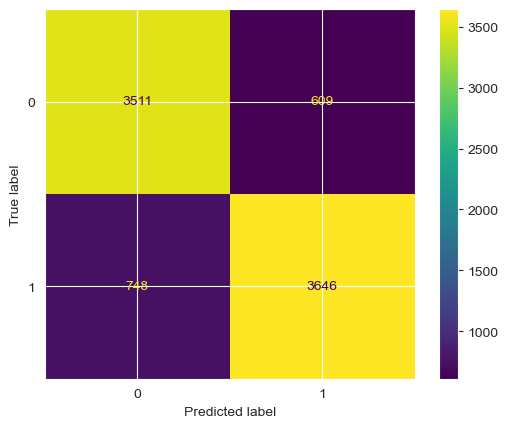

In [247]:
#plot a confusion matrix
plt.figure(dpi=300)
ConfusionMatrixDisplay.from_predictions(y_pred_xgbc_oversampled , y_test);

We also notice a huge improvement on the model performance on both accuracy and F1 score. The F1 score has leaped from 47% to 84%! The performance is however less than that of random forest, but higher than adaboost.
We might need to check its performance on new data to for us to conclude that there is no overfitting.

In [ ]:
Conclusion